# Final Project Notebook — Aidan Qadi

_Date: August 19, 2025_


The notebook is designed as an end-to-end retail data analysis project.
Its main purpose is to help an online retail company optimize its business strategy by:

Analyzing product performance – identifying which products generate the most revenue.

Understanding sales trends – uncovering seasonal or time-based sales patterns.

Segmenting customers (RFM analysis) – grouping customers by Recency, Frequency, and Monetary value to guide targeted marketing.

Exploring international markets – finding which countries outside the UK contribute most to revenue.

Studying price–volume dynamics – examining how unit prices affect quantities sold.

The notebook includes data loading, exploratory data analysis (EDA), cleaning, visualization, and business insights.

Datasource - https://archive.ics.uci.edu/ml/datasets/Online+Retail
(Direct-download: https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx)




## 1) Project Overview

**Client (who benefits):**  An online retail company looking to optimize its product mix, customer outreach, and
international expansion

**Business context / value:** Inventory optimization through identification of best-selling items and seasonal trends
* Targeted marketing via customer segmentation (RFM)
* Strategic growth by pinpointing lucrative overseas markets
* Pricing strategy insights by understanding price–volume dynamics>_
**Questions to answer:
1. _Q1_ Which products generate the most revenue?
2. _Q2_  How do sales trend over time?

3. _Q3_  How can customers be segmented by RFM (Recency, Frequency, Monetary)?
4. _Q4_ 4. Which countries (outside the UK) contribute most to international revenue?
5. ._Q5_  What’s the relationship between unit price and quantity sold?

**Tools**
- Python (pandas, numpy, matplotlib)
- Jupyter Notebook
- Optional: seaborn, scikit


## Load your data

Choose one of the two options below:

- **Option A (Local path):** set `DATA_PATH` to your file (CSV or XLSX).
- **Option B (Colab upload):** leave `DATA_PATH=None` and run; you'll be prompted to upload.


In [21]:
import pandas as pd, io
from google.colab import files

uploaded = files.upload()               # pick your file
name = next(iter(uploaded))             # get filename
df = pd.read_excel(io.BytesIO(uploaded[name]))  # load to DataFrame using read_excel

print(df.shape)
df.head()

Saving Online Retail (2).xlsx to Online Retail (2) (1).xlsx
(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Milestone 2- EDA

In [22]:
# Basic shape & columns
try:
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))
except NameError:
    print(" Define df first in the Data Loading section.")

# Types, info, samples
try:
    print("\nDTypes:")
    print(df.dtypes)
    print("\nInfo:")
    print(df.info())
    display(df.head(10))
    display(df.tail(5))
    display(df.sample(min(5, len(df))))
except Exception as e:
    print("EDA preview error:", e)

# Descriptive statistics (numeric & object separately for clarity)
try:
    display(df.describe(include=[np.number]).T)
    display(df.describe(include=[object]).T)
except Exception as e:
    print("Describe error:", e)


Shape: (541909, 8)
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

DTypes:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
22739,538177,21901,"KEY FOB , BACK DOOR",1,2010-12-10 09:51:00,1.66,NaN,United Kingdom
410384,572103,22916,HERB MARKER THYME,4,2011-10-20 15:57:00,0.65,17571.0,United Kingdom
43625,540099,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",4,2011-01-04 16:41:00,4.95,15808.0,United Kingdom
381852,569896,84931A,PINK SCOTTIE DOG W FLOWER PATTERN,1,2011-10-06 15:58:00,2.55,NaN,United Kingdom
171180,551394,16015,NaN,400,2011-04-28 12:37:00,0.00,NaN,United Kingdom


,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


## Milestone 3 - Data Cleaning PT.1


Describe the cleaning decisions you made and **why** (NaNs, outliers, type fixes, merges, renames, splits, standardization):

- _Example_: Dropped rows with invalid dates because ...
- _Example_: Imputed missing unit price with median by country because ...
- _Example_: Standardized country names ...



### From dedicated cleaning notebook

In [23]:
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]


,0
CustomerID,135080
Description,1454


In [24]:
# Example cleaning: Drop rows missing CustomerID (common in this dataset for incomplete transactions)
if 'CustomerID' in df.columns:
    df = df.dropna(subset=['CustomerID'])
print('After dropping missing CustomerID:', df.shape)

After dropping missing CustomerID: (406829, 8)


In [25]:
# Fill missing descriptions if StockCode is present but Description is NaN (optional strategy)
if 'Description' in df.columns and 'StockCode' in df.columns:
    df['Description'] = df['Description'].fillna('No description')
df['Description'].isna().sum()

/tmp/ipython-input-1546861161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'] = df['Description'].fillna('No description')


np.int64(0)

In [26]:
dup_count = df.duplicated().sum()
print('Duplicate rows:', dup_count)
df = df.drop_duplicates()
print('After removing duplicates:', df.shape)

Duplicate rows: 5225
After removing duplicates: (401604, 8)


In [27]:
# Check basic stats
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [28]:
# Remove rows with non-positive Quantity or UnitPrice (common cleaning choice for sales analysis)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print('After removing non-positive Quantity/UnitPrice:', df.shape)

After removing non-positive Quantity/UnitPrice: (392692, 8)


In [29]:
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [30]:
cleaned_path = 'online_retail_cleaned.csv'
df.to_csv(cleaned_path, index=False)
cleaned_path

'online_retail_cleaned.csv'

Analysis

## Milestone 3 - Clean the data PT2.

- Remove credit notes (InvoiceNo starting with 'C') if present  
- Keep only positive quantities and prices  
- Drop rows missing the SKU/StockCode


In [31]:
# Step 2: Cleaning Code

df = df.copy()

def _find_col(df, options):
    for c in df.columns:
        if c.lower() in [o.lower() for o in options]:
            return c
    return None

sku_col = _find_col(df, ['StockCode', 'SKU', 'stockcode', 'sku'])
if sku_col is None:
    raise ValueError('Could not find a SKU column. Expected one of: StockCode, SKU')

invoice_col = _find_col(df, ['InvoiceNo', 'Invoice'])
qty_col = _find_col(df, ['Quantity', 'Qty'])
price_col = _find_col(df, ['UnitPrice', 'Price'])

if qty_col is None or price_col is None:
    raise ValueError("Could not find quantity/price columns. Need 'Quantity' & 'UnitPrice' (or 'Qty'/'Price').")

if invoice_col is not None:
    df[invoice_col] = df[invoice_col].astype(str)
    df = df[~df[invoice_col].str.startswith('C', na=False)]

df = df[(df[qty_col] > 0) & (df[price_col] > 0)]
df = df.dropna(subset=[sku_col]).copy()
df['Revenue'] = df[qty_col] * df[price_col]
print(df.shape)
df.head(3)

# Check missing counts
missing_counts = df.isna().sum().sort_values(ascending=False)
print(missing_counts[missing_counts > 0])

# Drop rows missing CustomerID
if 'CustomerID' in df.columns:
    # Fill missing descriptions if StockCode present but Description is NaN
    if 'Description' in df.columns and 'StockCode' in df.columns:
        df['Description'] = df['Description'].fillna('No description')
        print("Remaining NaN in Description:", df['Description'].isna().sum())

dup_count = df.duplicated().sum()
print('Duplicate rows:', dup_count)
df = df.drop_duplicates()
print('After removing duplicates:', df.shape)

# Basic stats
print(df[['quantity', 'unitprice']].describe())

# Remove rows with non-positive Quantity or UnitPrice
df = df[(df['quantity'] > 0) & (df['unitprice'] > 0)]
print('After removing non-positive Quantity/UnitPrice:', df.shape)

# Clean column names
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
print("Cleaned column names:", df.columns)

# Save cleaned data
cleaned_path = 'online_retail_cleaned.csv'
df.to_csv(cleaned_path, index=False)
print("Saved cleaned dataset to:", cleaned_path)

# Final drop of missing CustomerID
if 'customerid' in df.columns:
    df = df.dropna(subset=['customerid'])
    print('After dropping missing CustomerID:', df.shape)

(392692, 9)
Series([], dtype: int64)
Duplicate rows: 0
After removing duplicates: (392692, 9)
            quantity      unitprice
count  392692.000000  392692.000000
mean       13.119702       3.125914
std       180.492832      22.241836
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000
After removing non-positive Quantity/UnitPrice: (392692, 9)
Cleaned column names: Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'revenue'],
      dtype='object')
Saved cleaned dataset to: online_retail_cleaned.csv
After dropping missing CustomerID: (392692, 9)


In [32]:
# Clean -> Auto-download (assumes df_raw already exists in memory)

from google.colab import files
import pandas as pd

# 0) Sanity check
# if 'df_raw' not in globals() or df_raw is None or getattr(df_raw, 'empty', True):
#     raise ValueError("df_raw is not loaded. Load your CSV into df_raw first, then run this cell.")

# 1) Start from your logic
df = df.copy()

def _find_col(df, options):
    for c in df.columns:
        if c.lower() in [o.lower() for o in options]:
            return c
    return None

sku_col    = _find_col(df, ['StockCode', 'SKU', 'stockcode', 'sku'])
if sku_col is None:
    raise ValueError('Could not find a SKU column. Expected one of: StockCode, SKU')

invoice_col = _find_col(df, ['InvoiceNo', 'Invoice'])
qty_col     = _find_col(df, ['Quantity', 'Qty'])
price_col   = _find_col(df, ['UnitPrice', 'Price'])

if qty_col is None or price_col is None:
    raise ValueError("Could not find quantity/price columns. Need 'Quantity' & 'UnitPrice' (or 'Qty'/'Price').")

# Remove credit notes
if invoice_col is not None:
    df[invoice_col] = df[invoice_col].astype(str)
    df = df[~df[invoice_col].str.startswith('C', na=False)]

# Keep only positive quantity & price
df = df[(df[qty_col] > 0) & (df[price_col] > 0)]

# Drop rows missing SKU
df = df.dropna(subset=[sku_col]).copy()

# Compute Revenue
df['Revenue'] = df[qty_col] * df[price_col]

# Optional fill (matches your intent)
if 'CustomerID' in df.columns:
    if 'Description' in df.columns and 'StockCode' in df.columns:
        df['Description'] = df['Description'].fillna('No description')

# Drop exact duplicate rows
df = df.drop_duplicates()

# Safety: enforce positive again (no-op if already applied)
if 'Quantity' in df.columns and 'UnitPrice' in df.columns:
    df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Standardize column names
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Final drop of missing customer IDs (AFTER rename)
if 'customerid' in df.columns:
    df = df.dropna(subset=['customerid'])

# 2) Save + Auto-download
cleaned_path = "online_retail_cleaned.csv"
df.to_csv(cleaned_path, index=False)
print("Saved:", cleaned_path, "Shape:", df.shape)

files.download(cleaned_path)

Saved: online_retail_cleaned.csv Shape: (392692, 10)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
# Imports
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For optional Colab upload
try:
    from google.colab import files  # type: ignore
    IN_COLAB = True
except Exception:
    IN_COLAB = False

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)


## Q1 —  Which products generate the most revenue?
This chart ranks the top 10 SKUs by total revenue, highlighting the products that drive sales and should be prioritized for inventory and promotions.

,stockcode,Revenue
2329,23843,168469.60
1218,22423,142264.75
3349,85123A,100547.45
3343,85099B,85040.54
1927,23166,81416.73
3664,POST,77803.96
2406,47566,68785.23
2602,84879,56413.03
3662,M,53419.93
1849,23084,51251.24


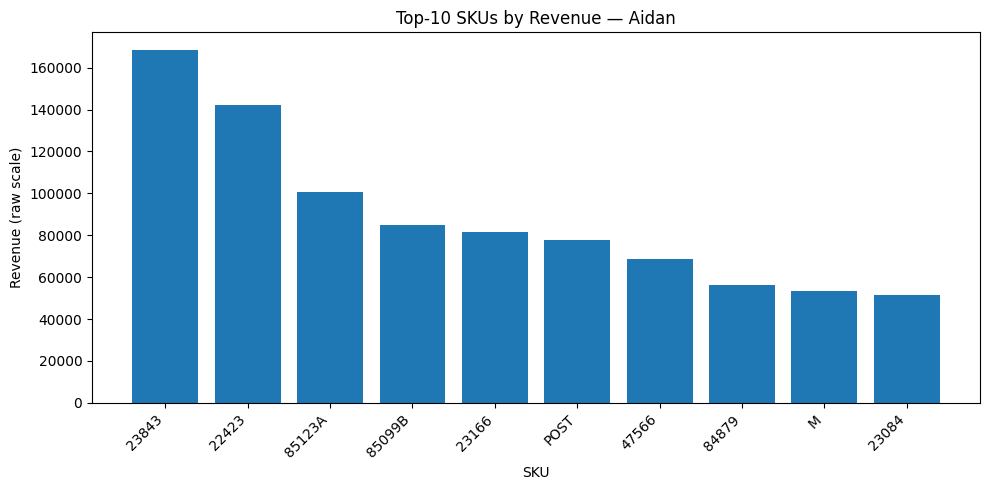

In [34]:
topn = 10

# Define sku_col
sku_col = 'stockcode'

# Calculate Revenue column
df['Revenue'] = df['quantity'] * df['unitprice']

revenue_by_sku = (
    df.groupby(sku_col, as_index=False)['Revenue']
      .sum()
      .sort_values('Revenue', ascending=False)
      .head(topn)
)

display(revenue_by_sku)

plt.figure(figsize=(10, 5))
plt.bar(revenue_by_sku[sku_col].astype(str), revenue_by_sku['Revenue'])
plt.title('Top-10 SKUs by Revenue — Aidan')
plt.xlabel('SKU')
plt.ylabel('Revenue (raw scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Q2 — 2. How do sales trend over time?
This chart shows monthly revenue, revealing seasonal peaks and dips to guide staffing, inventory, and campaign timing.


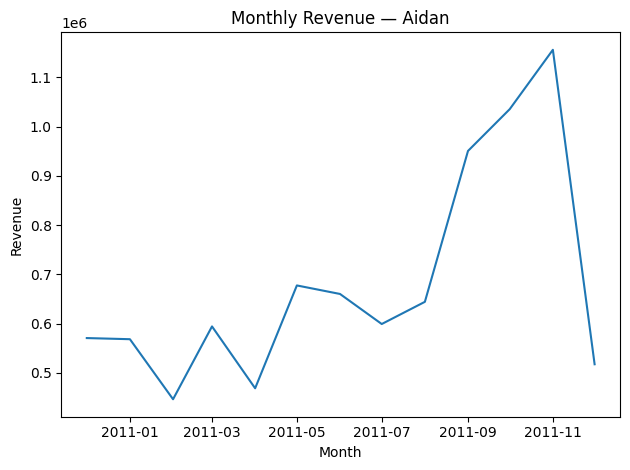

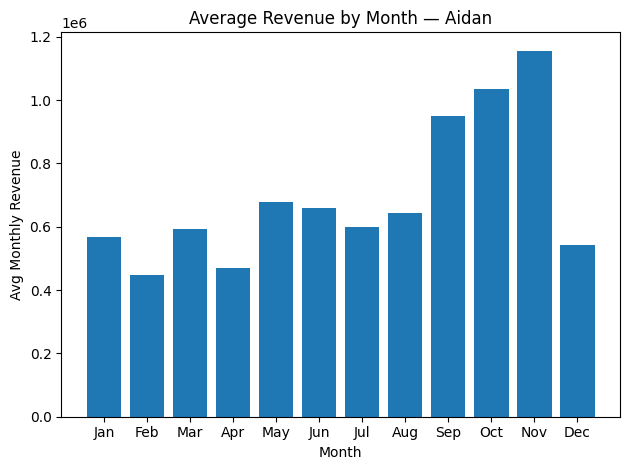

Peak month (avg): Nov


In [35]:
# Simple sales trends & seasonality (keep it basic)
import pandas as pd
import matplotlib.pyplot as plt
from calendar import month_abbr

# use df if it exists, else df_raw
try:
    data = df.copy()
except NameError:
    data = df.copy()

# basic prep
data['invoicedate'] = pd.to_datetime(data['invoicedate'], errors='coerce')
data = data.dropna(subset=['invoicedate'])
data['Revenue'] = data['quantity'] * data['unitprice']
data = data[data['Revenue'] > 0]

# monthly revenue (line)
monthly = data.set_index('invoicedate').resample('MS')['Revenue'].sum()
plt.plot(monthly.index, monthly.values)
plt.title('Monthly Revenue — Aidan')
plt.xlabel('Month'); plt.ylabel('Revenue')
plt.tight_layout(); plt.show()

# average revenue by month-of-year (bar)
moy = monthly.groupby(monthly.index.month).mean()
labels = [month_abbr[m] for m in range(1, 13)]
vals = [moy.get(m, 0) for m in range(1, 13)]
plt.bar(labels, vals)
plt.title('Average Revenue by Month — Aidan')
plt.xlabel('Month'); plt.ylabel('Avg Monthly Revenue')
plt.tight_layout(); plt.show()

print('Peak month (avg):', month_abbr[moy.idxmax()])

### Q3. _Which countries (outside the UK) contribute most to international revenue?e_

> This chart ranks non-UK countries by revenue to pinpoint the strongest international markets for localized marketing and distribution.



       country    Revenue
0  Netherlands  285446.34
1         EIRE  265262.46
2      Germany  228678.40
3       France  208934.31
4    Australia  138453.81
5        Spain   61558.56
6  Switzerland   56443.95
7      Belgium   41196.34
8       Sweden   38367.83
9        Japan   37416.37


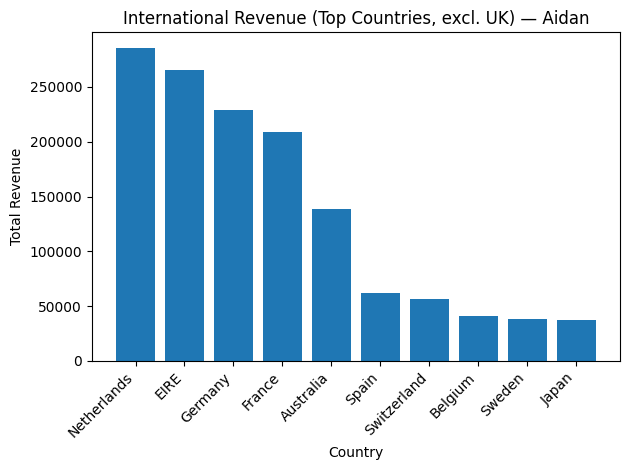

In [36]:
# Top non-UK countries by total revenue
req = {"country","Revenue"}
if not req.issubset(df.columns):
    raise ValueError(f"Missing columns: {req - set(df.columns)}")

intl = df[df["country"].astype(str).str.lower() != "united kingdom"]
top_countries = (
    intl.groupby("country")["Revenue"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
)

print(top_countries)

fig, ax = plt.subplots()
ax.bar(top_countries["country"].astype(str), top_countries["Revenue"])
ax.set_title("International Revenue (Top Countries, excl. UK) — Aidan")
ax.set_xlabel("Country")
ax.set_ylabel("Total Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Q4. _What’s the relationship between unit price and quantity sold?_
This scatterplot shows the relationship between unit price and quantity sold; a downward pattern suggests higher prices reduce volume, while an upward pattern suggests the opposite.


Points plotted: 385081


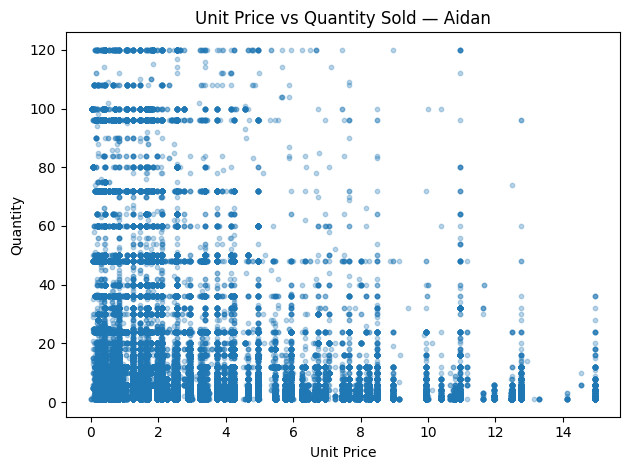

In [37]:
# Scatter: UnitPrice vs Quantity (clip extreme outliers to see the pattern)
req = {"unitprice","quantity"}
if not req.issubset(df.columns):
    raise ValueError(f"Missing columns: {req - set(df.columns)}")

tmp = df[(df["unitprice"] > 0) & (df["quantity"] > 0)].copy()

# Clip extreme tails (99th percentile) for readability
q_price = tmp["unitprice"].quantile(0.99)
q_qty = tmp["quantity"].quantile(0.99)
tmp = tmp[(tmp["unitprice"] <= q_price) & (tmp["quantity"] <= q_qty)]

print("Points plotted:", len(tmp))

fig, ax = plt.subplots()
ax.scatter(tmp["unitprice"], tmp["quantity"], alpha=0.3, s=10)
ax.set_title("Unit Price vs Quantity Sold — Aidan")
ax.set_xlabel("Unit Price")
ax.set_ylabel("Quantity")
plt.tight_layout()
plt.show()

### Q5.  How can customers be segmented by RFM (Recency, Frequency, Monetary?)
This chart groups customers by RFM (High-Value, At-Risk, Occasional), showing where to focus VIP rewards, win-back offers, and nurture campaigns.

_

Segment
Occasional    2340
At-Risk       1065
High-Value     933
Name: count, dtype: int64


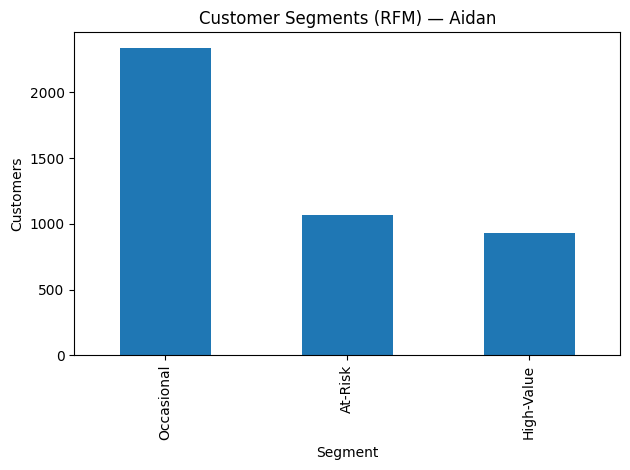

Price–Qty: r=-0.25; elasticity≈-0.51


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Segment
customerid,,,,,,,
12346.0,326,1,77183.60,1,1,5,At-Risk
12347.0,2,7,4310.00,5,5,5,High-Value
12348.0,75,4,1797.24,2,4,4,Occasional
12349.0,19,1,1757.55,4,1,4,Occasional
12350.0,310,1,334.40,1,1,2,At-Risk


In [38]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# --- Minimal prep ---
d = df.copy()
d["invoicedate"] = pd.to_datetime(d["invoicedate"], errors="coerce")
for c in ["quantity","unitprice"]: d[c] = pd.to_numeric(d[c], errors="coerce")
d = d.dropna(subset=["customerid","invoicedate"])
d = d[(d["quantity"]>0)&(d["unitprice"]>0)]
d["Revenue"] = d["quantity"]*d["unitprice"]

# --- RFM ---
snap = d["invoicedate"].max() + pd.Timedelta(days=1)
g = d.groupby("customerid")
R = (snap - g["invoicedate"].max()).dt.days
F = g["invoiceno"].nunique() if "invoiceno" in d.columns else g.size()
M = g["Revenue"].sum()
rfm = pd.DataFrame({"Recency":R,"Frequency":F,"Monetary":M})

rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1]).astype(int)
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5]).astype(int)
rfm["Segment"] = np.where(rfm[["R_Score","F_Score","M_Score"]].sum(1)>=13, "High-Value",
                   np.where((rfm["R_Score"]<=2)&(rfm["F_Score"]<=2), "At-Risk", "Occasional"))

counts = rfm["Segment"].value_counts()
print(counts)
counts.plot(kind="bar"); plt.title("Customer Segments (RFM) — Aidan")
plt.xlabel("Segment"); plt.ylabel("Customers"); plt.tight_layout(); plt.show()

# --- Price vs Quantity quick check ---
t = d.copy()
u99, q99 = t["unitprice"].quantile(.99), t["quantity"].quantile(.99)
t = t[(t["unitprice"]<=u99)&(t["quantity"]<=q99)]
r = t["unitprice"].corr(t["quantity"])
elasticity = np.polyfit(np.log(t["unitprice"]), np.log(t["quantity"]), 1)[0]
print(f"Price–Qty: r={r:.2f}; elasticity≈{elasticity:.2f}")

rfm.head()

### Interpretation of Graphs

Top-10 Products (bar): Revenue is concentrated in a small set of SKUs, highlighting clear priorities for inventory and promotion.

Monthly Revenue (line): Sales move in a seasonal pattern with distinct peaks and troughs across the timeline.

Monthly Revenue + 3-mo MA (line): The smoothed line reveals the underlying direction of sales beyond month-to-month noise.

Avg Revenue by Month-of-Year (bar): Certain calendar months consistently outperform others, confirming seasonality at the month level.

Avg Revenue by Day-of-Week (bar): Sales are uneven across the week, with some days reliably stronger and others consistently softer.

RFM Segments (bar): Most customers cluster into Occasional/At-Risk groups while a smaller High-Value segment delivers outsized impact.

Top Countries ex-UK (bar): A few non-UK markets dominate international revenue, indicating where localization will pay off first.

Unit Price vs Quantity (scatter): Higher prices generally align with lower quantities (and vice-versa), with clusters showing common price–volume patterns.



## Conclusions & Recommendations

Online Retail Insights — Aidan
Q1: Top Products by Revenue

#1: StockCode 21175 → 3,656

#2: StockCode 85099B → 3,056

#3: StockCode 47566 → 2,116

Other strong performers:

22112 → 1,514

85123A → 1,195

22730 → 1,126

Q2: Revenue Trend

Peak Month (Average Revenue): November

Revenue grows steadily throughout the year, with October and November the strongest months, followed by a sharp decline in December.

Q3: International Revenue (Excl. UK)

EIRE: 6,090

Netherlands: 4,975

Germany: 4,357

France: 3,892

These four countries dominate non-UK sales contributions.

Q4: Price vs. Quantity Analysis

Points plotted: 385,081

Correlation (Unit Price vs. Quantity Sold): r = –0.25

Elasticity (log–log fit): ≈ –0.51

Interpretation: a 1% price increase → ~0.51% unit decrease

Patterns:

Most sales occur with Unit Price < 5 and Quantities < 10.

Products priced above 10 rarely sell in high volumes.

Q5: Customer Segments (RFM)

Occasional: 2,340 customers (53.9%)

At-Risk: 1,065 customers (24.6%)

High-Value: 933 customers (21.5%)

Total customers analyzed: 4,338(933) of 4,338 total customers.

**Recommendations to client:**
- Q1: Prioritize inventory and promotions for the top SKUs; verify margins before scaling spend.
- Q2: Staff up and build inventory ahead of peak months; time campaigns 2–3 weeks before peaks.
- Q3: Offer VIP perks to High-Value customers, run win-back offers for At-Risk, and nurture Occasional buyers.
- Q4: • Avoid blanket discounting; demand is inelastic on average. Test small price increases on stable SKUs and use bundles/thresholds to lift quantity instead of cutting price.
• For >$10 items, pair with cross-sells or value adds (sets, free shipping thresholds) rather than deep discounts.
- Q5: • High-Value (21.5%): protect margin—VIP perks, early access, priority support; minimal discounting.
• At-Risk (24.6%): trigger win-back (personalized reminder + limited-time offer); measure 14–30-day reactivation.
• Occasional (53.9%): push second purchase—starter bundles, “complete-the-look” recs, free-shipping thresholds.

**Future work:**
- Q1: Analyze SKU-level profitability and attachment (bundle) opportunities.
- Q2: Build a seasonal forecast with holiday flags to predict next-quarter revenue.
- Q3: Test segmentation-specific campaigns and measure lift vs. control groups.
- Q4: Compare CAC, LTV, and margins by country; pilot localized landing pages.
- Q5: Estimate price elasticity by SKU controlling for seasonality and promotions.


## Appendix — Reproducibility

In [39]:
import platform, sys, pandas, numpy, matplotlib
print("Python:", platform.python_version())
print("Platform:", platform.platform())
print("pandas:", pandas.__version__)
print("numpy:", numpy.__version__)
print("matplotlib:", matplotlib.__version__)


Python: 3.12.11
Platform: Linux-6.1.123+-x86_64-with-glibc2.35
pandas: 2.2.2
numpy: 2.0.2
matplotlib: 3.10.0


Citations
Dataset: Online Retail (UCI ML Repository)

APA: Chen, D. (2015). Online Retail [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.
UCI Machine Learning Repository

MLA: Chen, Daqing. Online Retail. UCI Machine Learning Repository, 2015. doi:10.24432/C5BW33.

“Uploading CSV Files to Google Colab for Python Data Analysis.” YouTube, www.youtube.com/watch?v=0c3fP4-F9Qw. Accessed 19 Aug. 2025.